# Instalação das bibliotecas

In [31]:
# Instalação de biblioteca para acesso aos datasets da University of California, Irvine (UCI) Machine Learning Repository

%pip install -U ucimlrepo
from ucimlrepo import fetch_ucirepo

In [32]:
# Importação das bibliotecas de:
# - redimensionamento/reescalonamento de variáveis
# - busca por hiperparâmetros
# - validação cruzada
# - divisão do dataset para teste e treino
# - avaliação das métricas do modelo

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, auc, RocCurveDisplay, roc_auc_score, f1_score, recall_score, accuracy_score, confusion_matrix, classification_report

# Importação das bibliotecas de modelos de aprendizado de máquina

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB

# Importação das bibliotecas para visualização de gráficos

import seaborn as sns
import matplotlib.pyplot as plt

# Importação de biblioteca para processamento matemático

import numpy as np

# Importação de bibliotecas para manipulação de diretórios e análise de dados

import os
from pathlib import Path
import pandas as pd

# Coleta de dados e criação do dataset


> O dataset foi construído a partir de um estudo de coorte prospectiva contemplando 383 pacientes observados por uma duração mínima de 10 anos dentro de um período total de observação de 15 anos

In [33]:
# Criação de diretórios para armazenamento do dataset

# "differentiated_thyroid_cancer_recurrence" = "dtcr"

file_features  = '../data/pickle/dtcr_features.pkl'
file_targets   = '../data/pickle/dtcr_targets.pkl'

Path("/data/pickle").mkdir(parents=True, exist_ok=True)

dtcr = fetch_ucirepo(id=915)

# Armazenamento das variáveis (features) e desfechos (targets) do dataset

X = dtcr.data.features
y = dtcr.data.targets

X.to_pickle(file_features)
print(f"Arquivo {file_features} foi gerado.")

print(f"Arquivo {file_targets} foi gerado.")
y.to_pickle(file_targets)

# Visualização do formato do dataset sem os desfechos

features = X.columns
X.head()

Arquivo ../data/pickle/dtcr_features.pkl foi gerado.
Arquivo ../data/pickle/dtcr_targets.pkl foi gerado.


,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent


In [34]:
# Categorias do dataset

features

Index(['Age', 'Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy',
       'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology',
       'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response'],
      dtype='object')

# Apresentação dos dados

> Categorias (variáveis) iniciais: 16

- 'Age'
- 'Gender'
- 'Smoking'
- 'Hx Smoking'
- 'Hx Radiothreapy'
- 'Thyroid Function'
- 'Physical Examination'
- 'Adenopathy'
- 'Pathology'
- 'Focality'
- 'Risk'
- 'T'
- 'N'
- 'M'
- 'Stage'
- 'Response'

> Número de instâncias: 383


In [35]:
# Visualização dos valores e tipo existentes para cada variável

for i in X.columns:
  print(X[i].value_counts(), "\n")

Age
31    22
27    13
40    12
28    12
33    12
      ..
69     1
66     1
76     1
18     1
78     1
Name: count, Length: 65, dtype: int64 

Gender
F    312
M     71
Name: count, dtype: int64 

Smoking
No     334
Yes     49
Name: count, dtype: int64 

Hx Smoking
No     355
Yes     28
Name: count, dtype: int64 

Hx Radiothreapy
No     376
Yes      7
Name: count, dtype: int64 

Thyroid Function
Euthyroid                      332
Clinical Hyperthyroidism        20
Subclinical Hypothyroidism      14
Clinical Hypothyroidism         12
Subclinical Hyperthyroidism      5
Name: count, dtype: int64 

Physical Examination
Multinodular goiter            140
Single nodular goiter-right    140
Single nodular goiter-left      89
Normal                           7
Diffuse goiter                   7
Name: count, dtype: int64 

Adenopathy
No           277
Right         48
Bilateral     32
Left          17
Extensive      7
Posterior      2
Name: count, dtype: int64 

Pathology
Papillary         287
Mi

In [36]:
# Avaliando a existência de valores nulos no dataset

X.isnull().sum()

,0
Age,0
Gender,0
Smoking,0
Hx Smoking,0
Hx Radiothreapy,0
Thyroid Function,0
Physical Examination,0
Adenopathy,0
Pathology,0
Focality,0


In [37]:
# Apresentação da quantidade para cada desfecho

print(y.value_counts())

Recurred
No          275
Yes         108
Name: count, dtype: int64


# Tratamento dos dados

## Desfecho

In [38]:
# Mapeando os desfechos: "1" para "Yes", "0" para "No"

y = y.applymap(lambda x: 1 if x == "Yes" else 0)

print(y.value_counts())

Recurred
0           275
1           108
Name: count, dtype: int64


<ipython-input-38-bfba1ca34c04>:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  y = y.applymap(lambda x: 1 if x == "Yes" else 0)


## Age

In [39]:
# Reescalando a coluna "Age" para valores entre 0 e 1

scaler = MinMaxScaler(feature_range=(0,1))
X[["Age"]] = scaler.fit_transform(X[["Age"]])
X["Age"].value_counts()

<ipython-input-39-616c2db2e802>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[["Age"]] = scaler.fit_transform(X[["Age"]])


,count
Age,
0.238806,22
0.179104,13
0.373134,12
0.194030,12
0.268657,12
...,...
0.805970,1
0.761194,1
0.910448,1


## Smoking, Hx Smoking, Hx Radiothreapy, Adenopathy, Gender, Thyroid Function, Physical Examination, Pathology, Focality, Risk, T, N, M, Stage, Response

In [40]:
# Renomeando a coluna com erro ortográfico

X.rename(columns={"Hx Radiothreapy":"Hx Radiotherapy"}, inplace=True)

<ipython-input-40-4599d4db1cbf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.rename(columns={"Hx Radiothreapy":"Hx Radiotherapy"}, inplace=True)


In [41]:
# Convertendo as variáveis categóricas a partir da criação de colunas com valores booleanos ("True", "False")

X = pd.get_dummies(X, columns=['Adenopathy', 'Gender', 'Thyroid Function', 'Physical Examination', 'Pathology',	'Focality',	'Risk', 'T', 'N',	'M',	'Stage',	'Response'])

In [42]:
# Visualização da conversão

X.head()

,Age,Smoking,Hx Smoking,Hx Radiotherapy,Adenopathy_Bilateral,Adenopathy_Extensive,Adenopathy_Left,Adenopathy_No,Adenopathy_Posterior,Adenopathy_Right,...,M_M1,Stage_I,Stage_II,Stage_III,Stage_IVA,Stage_IVB,Response_Biochemical Incomplete,Response_Excellent,Response_Indeterminate,Response_Structural Incomplete
0,0.179104,No,No,No,False,False,False,True,False,False,...,False,True,False,False,False,False,False,False,True,False
1,0.283582,No,Yes,No,False,False,False,True,False,False,...,False,True,False,False,False,False,False,True,False,False
2,0.223881,No,No,No,False,False,False,True,False,False,...,False,True,False,False,False,False,False,True,False,False
3,0.701493,No,No,No,False,False,False,True,False,False,...,False,True,False,False,False,False,False,True,False,False
4,0.701493,No,No,No,False,False,False,True,False,False,...,False,True,False,False,False,False,False,True,False,False


In [43]:
# Mapeando valores booleanos: "1" para "Yes" ou "True", "0" para "No" ou "False"

for i in ["Smoking", "Hx Smoking", "Hx Radiotherapy"]:
  X[i] = X[i].map(lambda x: 1 if x == "Yes" else 0)

for i in ['Adenopathy_Bilateral', 'Adenopathy_Extensive', 'Adenopathy_Left', 'Adenopathy_No', 'Adenopathy_Posterior', 'Adenopathy_Right', 'Gender_F', 'Gender_M', 'Thyroid Function_Clinical Hyperthyroidism',
       'Thyroid Function_Clinical Hypothyroidism',
       'Thyroid Function_Euthyroid',
       'Thyroid Function_Subclinical Hyperthyroidism',
       'Thyroid Function_Subclinical Hypothyroidism',
       'Physical Examination_Diffuse goiter',
       'Physical Examination_Multinodular goiter',
       'Physical Examination_Normal',
       'Physical Examination_Single nodular goiter-left',
       'Physical Examination_Single nodular goiter-right',
       'Pathology_Follicular', 'Pathology_Hurthel cell',
       'Pathology_Micropapillary', 'Pathology_Papillary',
       'Focality_Multi-Focal', 'Focality_Uni-Focal', 'Risk_High',
       'Risk_Intermediate', 'Risk_Low', 'T_T1a', 'T_T1b', 'T_T2', 'T_T3a',
       'T_T3b', 'T_T4a', 'T_T4b', 'N_N0', 'N_N1a', 'N_N1b', 'M_M0', 'M_M1',
       'Stage_I', 'Stage_II', 'Stage_III', 'Stage_IVA', 'Stage_IVB',
       'Response_Biochemical Incomplete', 'Response_Excellent',
       'Response_Indeterminate', 'Response_Structural Incomplete']:
    X[i] = X[i].map(lambda x: 1 if x == True else 0)

In [44]:
# Visualização do mapeando

X.head()

,Age,Smoking,Hx Smoking,Hx Radiotherapy,Adenopathy_Bilateral,Adenopathy_Extensive,Adenopathy_Left,Adenopathy_No,Adenopathy_Posterior,Adenopathy_Right,...,M_M1,Stage_I,Stage_II,Stage_III,Stage_IVA,Stage_IVB,Response_Biochemical Incomplete,Response_Excellent,Response_Indeterminate,Response_Structural Incomplete
0,0.179104,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0.283582,0,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
2,0.223881,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
3,0.701493,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
4,0.701493,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0


## Apresentação das novas categorias

In [45]:
# Visualização das novas categorias no pré-processamento

X.columns

Index(['Age', 'Smoking', 'Hx Smoking', 'Hx Radiotherapy',
       'Adenopathy_Bilateral', 'Adenopathy_Extensive', 'Adenopathy_Left',
       'Adenopathy_No', 'Adenopathy_Posterior', 'Adenopathy_Right', 'Gender_F',
       'Gender_M', 'Thyroid Function_Clinical Hyperthyroidism',
       'Thyroid Function_Clinical Hypothyroidism',
       'Thyroid Function_Euthyroid',
       'Thyroid Function_Subclinical Hyperthyroidism',
       'Thyroid Function_Subclinical Hypothyroidism',
       'Physical Examination_Diffuse goiter',
       'Physical Examination_Multinodular goiter',
       'Physical Examination_Normal',
       'Physical Examination_Single nodular goiter-left',
       'Physical Examination_Single nodular goiter-right',
       'Pathology_Follicular', 'Pathology_Hurthel cell',
       'Pathology_Micropapillary', 'Pathology_Papillary',
       'Focality_Multi-Focal', 'Focality_Uni-Focal', 'Risk_High',
       'Risk_Intermediate', 'Risk_Low', 'T_T1a', 'T_T1b', 'T_T2', 'T_T3a',
       'T_T3b', 'T_

In [46]:
# Visualização dos valores no pré-processamento

for i in X.columns:
  print(X[i].value_counts(), "\n")

Age
0.238806    22
0.179104    13
0.373134    12
0.194030    12
0.268657    12
            ..
0.805970     1
0.761194     1
0.910448     1
0.044776     1
0.940299     1
Name: count, Length: 65, dtype: int64 

Smoking
0    334
1     49
Name: count, dtype: int64 

Hx Smoking
0    355
1     28
Name: count, dtype: int64 

Hx Radiotherapy
0    376
1      7
Name: count, dtype: int64 

Adenopathy_Bilateral
0    351
1     32
Name: count, dtype: int64 

Adenopathy_Extensive
0    376
1      7
Name: count, dtype: int64 

Adenopathy_Left
0    366
1     17
Name: count, dtype: int64 

Adenopathy_No
1    277
0    106
Name: count, dtype: int64 

Adenopathy_Posterior
0    381
1      2
Name: count, dtype: int64 

Adenopathy_Right
0    335
1     48
Name: count, dtype: int64 

Gender_F
1    312
0     71
Name: count, dtype: int64 

Gender_M
0    312
1     71
Name: count, dtype: int64 

Thyroid Function_Clinical Hyperthyroidism
0    363
1     20
Name: count, dtype: int64 

Thyroid Function_Clinical Hypothyr

# Matrix de correlação

In [47]:
# Criação da matrix de correlação

corr = X.corr()
cmap = "BrBG_r"

mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr[mask] = np.nan
(corr
 .style
 .background_gradient(cmap=cmap, axis=None, vmin=-1, vmax=1)
 .highlight_null(color='#f1f1f1')  # Color NaNs grey
 .format(precision=2))

,Age,Smoking,Hx Smoking,Hx Radiotherapy,Adenopathy_Bilateral,Adenopathy_Extensive,Adenopathy_Left,Adenopathy_No,Adenopathy_Posterior,Adenopathy_Right,Gender_F,Gender_M,Thyroid Function_Clinical Hyperthyroidism,Thyroid Function_Clinical Hypothyroidism,Thyroid Function_Euthyroid,Thyroid Function_Subclinical Hyperthyroidism,Thyroid Function_Subclinical Hypothyroidism,Physical Examination_Diffuse goiter,Physical Examination_Multinodular goiter,Physical Examination_Normal,Physical Examination_Single nodular goiter-left,Physical Examination_Single nodular goiter-right,Pathology_Follicular,Pathology_Hurthel cell,Pathology_Micropapillary,Pathology_Papillary,Focality_Multi-Focal,Focality_Uni-Focal,Risk_High,Risk_Intermediate,Risk_Low,T_T1a,T_T1b,T_T2,T_T3a,T_T3b,T_T4a,T_T4b,N_N0,N_N1a,N_N1b,M_M0,M_M1,Stage_I,Stage_II,Stage_III,Stage_IVA,Stage_IVB,Response_Biochemical Incomplete,Response_Excellent,Response_Indeterminate,Response_Structural Incomplete
Age,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Smoking,0.31,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Hx Smoking,0.13,0.25,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Hx Radiotherapy,0.18,0.30,0.26,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Adenopathy_Bilateral,0.13,0.22,0.13,-0.04,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Adenopathy_Extensive,0.05,0.12,0.04,0.42,-0.04,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Adenopathy_Left,-0.03,0.03,-0.06,-0.03,-0.07,-0.03,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Adenopathy_No,-0.08,-0.23,-0.12,-0.09,-0.49,-0.22,-0.35,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Adenopathy_Posterior,0.03,-0.03,-0.02,-0.01,-0.02,-0.01,-0.02,-0.12,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Adenopathy_Right,-0.01,0.07,0.08,0.01,-0.11,-0.05,-0.08,-0.61,-0.03,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


<Axes: >

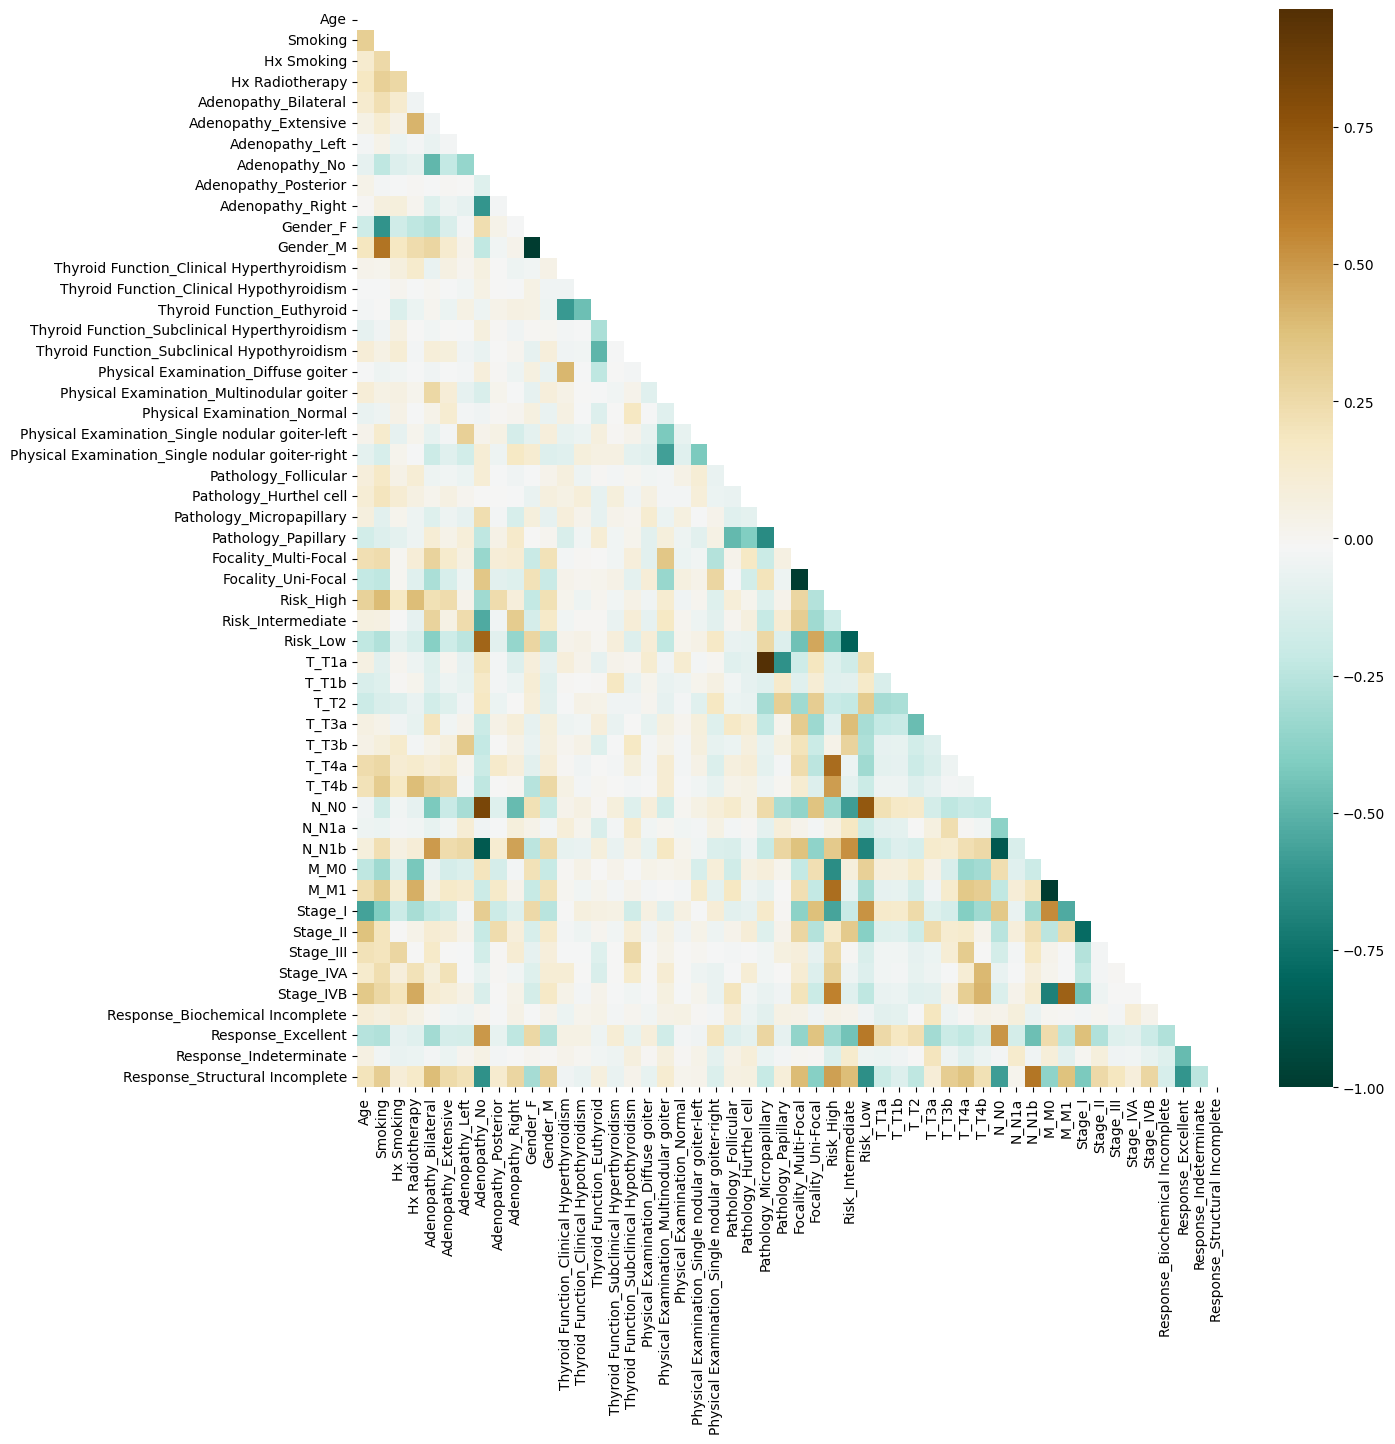

In [48]:
plt.figure(figsize=(14,14))
sns.heatmap(corr, cmap="BrBG_r")

Correlações em destaque:

> Positivas:

* 0,96 → Pathology_Micropapillary + T_T1a
* 0,83 → Adenopathy_No + N_N0
* 0,74 → Risk_Low + N_N0
* 0,70 → M_M1 + Stage_IVb
* 0,68 → Adenopathy_No + Risk_Low
* 0,65 → Risk_High + T_T4a
* 0,65 → Risk_High + M_M1
* 0,62 → Smoking + Gender_M

> Negativas:

* -1,00 → Gender_F + Gender_M
* -1,00 → Focality_Uni-Focal + Focality_Multi-Focal
* -1,00 → M_M0 + M_M1
* -0,86 → N_N1b + Adenopathy_No
* -0,86 → N_N1b + N_N0
* -0,82 → Risk_Intermediate + Risk_Low
* -0,78 → Stage_I + Stage_II
* -0,68 → Risk_Low + N_N1b

# Treinamento dos modelos

In [50]:
# Dividindo os dados em conjuntos de treinamento e teste (70% para treinamento, 30% para teste)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [51]:
# Transformando y_train e y_test em vetores unidimensionais

y = y.values.ravel()
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

In [52]:
# Criação das instâncias dos modelos para teste

models = {
    'Decision Tree': DecisionTreeClassifier(),
    'AdaBoost': AdaBoostRegressor(),
    'SVM_SVC': SVC(),
    'SVM_SVR': SVR(),
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'MLP Classifier': MLPClassifier(),
    'Gaussian NB': GaussianNB()
}

# Definição dos hiperparâmetros para teste

parameters = {
    'Decision Tree': {'max_depth': [None, 2, 3, 4, 6, 8], 'class_weight': [None, 'balanced']},
    'AdaBoost': {},
    'SVM_SVC': {'C': [0.1, 1, 10, 20, 30], 'gamma': [0.1, 0.01, 0.001]},
    'SVM_SVR': {},
    'Logistic Regression': {'C': [0.1, 1, 10]},
    'KNN': {'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 31, 45], 'metric': ['euclidean', 'manhattan']},
    'MLP Classifier': {'max_iter': [1000], 'solver': ['lbfgs', 'sgd', 'adam']},
    'Gaussian NB': {}
}

In [53]:
best_model = None
best_score = 0

# Iteração sobre os modelos e parâmetros para encontrar o melhor modelo

for model_name, model in models.items():
    clf = GridSearchCV(model, parameters[model_name], cv=5)
    clf.fit(X_train, y_train)
    score = clf.best_score_
    print(f"{model_name}: {score}")

    if score > best_score:
        best_model = clf.best_estimator_
        best_score = score

# Apresentação do  modelo e seus parâmetros

print("\nMelhor modelo:", best_model)

Decision Tree: 0.9477288609364081
AdaBoost: 0.7611238545036069
SVM_SVC: 0.9551362683438155
SVM_SVR: 0.7791058941681684
Logistic Regression: 0.9476589797344515
KNN: 0.9252969951083159
MLP Classifier: 0.9438853948287911
Gaussian NB: 0.9215234102026555

Melhor modelo: SVC(C=30, gamma=0.01)


# Avaliação do melhor modelo

In [54]:
# Previsões no subconjunto de teste

y_pred = best_model.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.96      0.97        83
           1       0.91      0.94      0.92        32

    accuracy                           0.96       115
   macro avg       0.94      0.95      0.95       115
weighted avg       0.96      0.96      0.96       115



### Matrix confusão

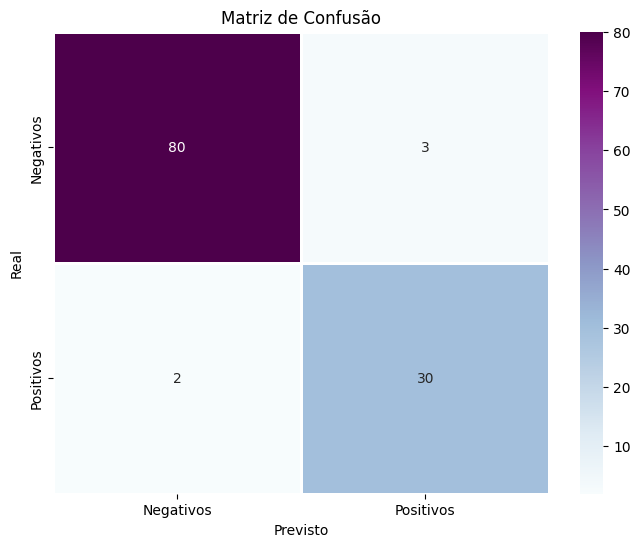

In [55]:
# Cálculo a matriz de confusão

cm = confusion_matrix(y_test, y_pred, labels = [0, 1])

# Criação do heatmap da matriz de confusão

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='BuPu', linewidth=2,
            xticklabels=['Negativos', 'Positivos'],
            yticklabels=['Negativos', 'Positivos'])
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

In [56]:
# Acurácia do teste

accuracy = accuracy_score(y_test, y_pred)
print("Acurácia do modelo: {:.2f}%".format(accuracy * 100))

# Sensibilidade (Recall = True Positive Rate) para a classe '1' (assumindo '1' como classe positiva)

sensitivity = recall_score(y_test, y_pred, pos_label=1)

# Especificidade para '1' → calculada como o número de verdadeiros negativos (VN) para '1', dividido pelo número de todos os casos negativos reais ('0')

specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])

# F1-Score para '1'

f1 = f1_score(y_test, y_pred, pos_label=1)

print("Sensibilidade (Recall) para '1':", sensitivity)
print("Especificidade para '1':", specificity)
print("F1-Score para '1':", f1)

Acurácia do modelo: 95.65%
Sensibilidade (Recall) para '1': 0.9375
Especificidade para '1': 0.963855421686747
F1-Score para '1': 0.923076923076923


### Curva ROC

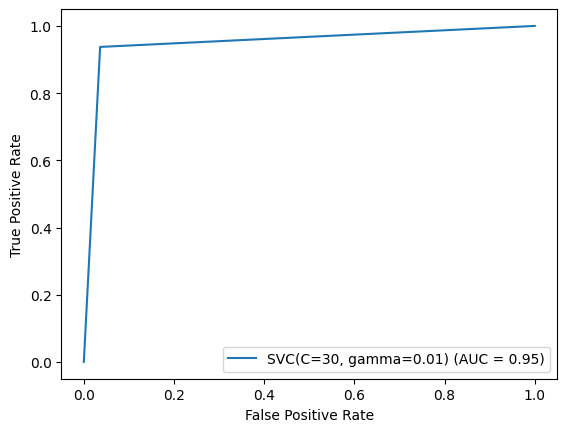

In [57]:
# Visualização da curva ROC

fpr,tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=best_model)
display.plot()
plt.show()